<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/portfolio/momentum_investing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [38]:
nifty50_url = "https://raw.githubusercontent.com/anirbanghoshsbi/data/main/ind_nifty50list.csv"
nifty50 = pd.read_csv(nifty50_url)
tickers = nifty50['Symbol'].apply(lambda x: x + ".NS").tolist()
# Bank Nifty Stocks
nifty_stocks = tickers
start_date='2022-01-01'
end_date='2024-02-28'

In [39]:
dataset = yf.download(nifty_stocks, start=start_date,end=end_date)['Adj Close']


[*********************100%%**********************]  50 of 50 completed


In [40]:
'''
# Define the list of Nifty 50 constituents
nifty_50_constituents = ['RELIANCE.NS', 'SBIN.NS', 'TCS.NS']  # Add more constituents as needed

# Download historical data for each constituent
data = {}
for ticker in nifty_50_constituents:
    data[ticker] = yf.download(ticker, start='1927-01-01', end='2014-12-31')
'''
# Combine the adjusted close prices into a single DataFrame

adj_close_data = {}
for ticker, df in dataset.items():
    if isinstance(df, pd.DataFrame) and 'Adj Close' in df.columns:
        adj_close_data[ticker] = df['Adj Close']
    elif isinstance(df, pd.Series):
        adj_close_data[ticker] = df  # Assuming the Series itself represents the 'Adj Close' prices

adj_close = pd.DataFrame(adj_close_data)


# Calculate monthly returns
returns = adj_close.pct_change(252)
returns2=adj_close.pct_change(126)
returns3=adj_close.pct_change(63)
returns4=adj_close.pct_change(21)
# Step 2: Calculate the monthly momentum variable
momentum_variable = returns+returns2+returns3+returns4

# Step 3: Select the top 25 stocks based on momentum variable
top_50_stocks = momentum_variable.sum().index
top_50_stocks_data = momentum_variable[top_50_stocks]

#
# Step 4: Implement PCA on the selected stocks after handling missing values
cleaned_data = top_50_stocks_data.dropna()  # Drop rows with missing values


In [41]:
cleaned_data

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-06,2.028240,0.160486,-0.054482,-0.264476,1.026843,0.130918,-0.242681,-0.435058,0.268425,0.160438,...,0.494075,-0.037071,-0.472343,0.568117,-0.148048,-0.523773,0.186137,0.212180,0.015360,-0.662736
2023-01-09,2.091803,0.208460,-0.024637,-0.261121,1.071743,0.098221,-0.268973,-0.416861,0.394020,0.160479,...,0.527464,0.030115,-0.374766,0.587900,-0.042964,-0.403786,0.014395,0.274461,0.103992,-0.573589
2023-01-10,1.739758,0.085222,0.025045,-0.291438,0.961259,0.045221,-0.303956,-0.495111,0.256461,0.148240,...,0.504606,0.052872,-0.175119,0.653654,-0.051993,-0.409544,0.007902,0.207758,0.054084,-0.542183
2023-01-11,1.679222,0.064643,-0.058409,-0.321763,0.879340,-0.057734,-0.354516,-0.524004,0.147128,0.237621,...,0.565500,-0.010758,-0.133774,0.629740,0.036194,-0.385015,-0.055129,0.261732,-0.015601,-0.522941
2023-01-12,1.716994,0.066579,-0.060697,-0.332566,0.825265,-0.012150,-0.368211,-0.511829,0.122752,0.174185,...,0.575890,-0.049208,-0.182518,0.606374,0.031817,-0.410455,-0.011291,0.347888,-0.007091,-0.449068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-21,1.650604,2.546927,1.268760,-0.071972,0.476705,2.659875,0.195100,-0.125501,1.012915,2.873423,...,1.372080,1.236139,2.057285,0.834859,0.469692,0.423723,0.728640,0.742703,-0.697109,0.921846
2024-02-22,1.778687,2.740660,1.297225,-0.003403,0.570845,2.857852,0.234067,-0.082649,0.960661,2.877468,...,1.370645,1.271263,2.166703,0.922416,0.645696,0.593537,0.704151,0.763536,-0.672668,1.081952
2024-02-23,1.745693,2.738154,1.284761,-0.027207,0.546700,2.778290,0.243394,-0.114905,0.856863,2.718744,...,1.385675,1.245583,2.177244,0.848690,0.585557,0.514538,0.733107,0.766713,-0.754359,1.086185


In [42]:
#cleaned_data = cleaned_data.clip(lower=cleaned_data.quantile(0.01), upper=cleaned_data.quantile(0.99), axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

pca = PCA(n_components=1)  # Considering only one component for simplicity
pca.fit(scaled_data)

# Step 5: Select the top 10 stocks based on PCA scores
pca_scores = pca.components_[0]
top_10_index = np.argsort(pca_scores)[-10:]
top_10_stocks = cleaned_data.iloc[:, top_10_index]

# Now, top_10_stocks contains the top 10 stocks for investment based on PCA scores
print(top_10_stocks)


            TITAN.NS  RELIANCE.NS  BAJAJ-AUTO.NS  ADANIPORTS.NS  \
Date                                                              
2023-01-06  0.186137     0.114647       0.130918       0.160486   
2023-01-09  0.014395     0.225489       0.098221       0.208460   
2023-01-10  0.007902     0.176762       0.045221       0.085222   
2023-01-11 -0.055129     0.120244      -0.057734       0.064643   
2023-01-12 -0.011291     0.024637      -0.012150       0.066579   
...              ...          ...            ...            ...   
2024-02-21  0.728640     0.849281       2.659875       2.546927   
2024-02-22  0.704151     0.911017       2.857852       2.740660   
2024-02-23  0.733107     0.913436       2.778290       2.738154   
2024-02-26  0.641159     0.851558       2.660496       2.787968   
2024-02-27  0.664025     0.774638       2.665287       2.710931   

            HEROMOTOCO.NS  BHARTIARTL.NS  WIPRO.NS  TATAMOTORS.NS  \
Date                                                       

In [43]:
print(top_10_stocks.columns.tolist())

['TITAN.NS', 'RELIANCE.NS', 'BAJAJ-AUTO.NS', 'ADANIPORTS.NS', 'HEROMOTOCO.NS', 'BHARTIARTL.NS', 'WIPRO.NS', 'TATAMOTORS.NS', 'TATACONSUM.NS', 'GRASIM.NS']


[*********************100%%**********************]  10 of 10 completed


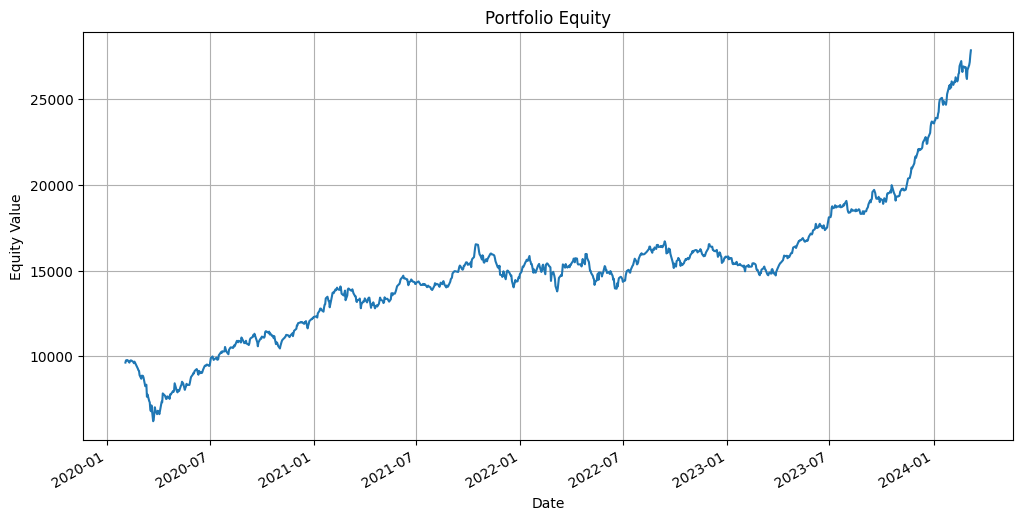

In [44]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Get today's date
today = pd.Timestamp.today().strftime('%Y-%m-%d')

# Define stock symbols and weights
symbols = top_10_stocks.columns.tolist()
weights = [1,1,1,1,1,1,1,1,1,1]
# Download historical price data
data = yf.download(symbols, start="2020-02-01", end=today)["Adj Close"]

# Calculate portfolio return by multiplying weights with daily returns
portfolio_return = (data * weights).sum(axis=1)

# Plot the portfolio return
plt.figure(figsize=(12, 6))
portfolio_return.plot(title="Portfolio Equity")
plt.ylabel("Equity Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()